## Exploratory Data Analysis 

#### Prudential Life Insurance Assessment
Dataset : https://www.kaggle.com/c/prudential-life-insurance-assessment/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('train_data.csv')

In [3]:
df.head()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0               2               1               1  0.641791  0.581818   
1               2               3               1  0.059701  0.600000   
2               2               3               1  0.029851  0.745455   
3               2               3               1  0.164179  0.672727   
4               2               3               1  0.417910  0.654545   

     ...     Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0    ...                      0                   0                   0   
1    ...                      0                   0                   0   
2    ...                      0                   0                   0   
3    ...                      0                   0                   0   
4    ...                      0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         8  
1                   0                   0                   0         4  
2                   0                   0                   0         8  
3                   0                   0                   0         8  
4                   0                   0                   0         8  

[5 rows x 128 columns]

In [4]:
#df = df_train.append(df_test) # creating single dataframe of train and test data to perform data cleaning and EDA

### 1. Handling Missing values

#### Statistical summary of the data 

In [5]:
df.describe()

Id  Product_Info_1  Product_Info_3  Product_Info_4  \
count  59381.000000    59381.000000    59381.000000    59381.000000   
mean   39507.211515        1.026355       24.415655        0.328952   
std    22815.883089        0.160191        5.072885        0.282562   
min        2.000000        1.000000        1.000000        0.000000   
25%    19780.000000        1.000000       26.000000        0.076923   
50%    39487.000000        1.000000       26.000000        0.230769   
75%    59211.000000        1.000000       26.000000        0.487179   
max    79146.000000        2.000000       38.000000        1.000000   

       Product_Info_5  Product_Info_6  Product_Info_7       Ins_Age  \
count    59381.000000    59381.000000    59381.000000  59381.000000   
mean         2.006955        2.673599        1.043583      0.405567   
std          0.083107        0.739103        0.291949      0.197190   
min          2.000000        1.000000        1.000000      0.000000   
25%          2.000000        3.000000        1.000000      0.238806   
50%          2.000000        3.000000        1.000000      0.402985   
75%          2.000000        3.000000        1.000000      0.567164   
max          3.000000        3.000000        3.000000      1.000000   

                 Ht            Wt      ...       Medical_Keyword_40  \
count  59381.000000  59381.000000      ...             59381.000000   
mean       0.707283      0.292587      ...                 0.056954   
std        0.074239      0.089037      ...                 0.231757   
min        0.000000      0.000000      ...                 0.000000   
25%        0.654545      0.225941      ...                 0.000000   
50%        0.709091      0.288703      ...                 0.000000   
75%        0.763636      0.345188      ...                 0.000000   
max        1.000000      1.000000      ...                 1.000000   

       Medical_Keyword_41  Medical_Keyword_42  Medical_Keyword_43  \
count        59381.000000        59381.000000        59381.000000   
mean             0.010054            0.045536            0.010710   
std              0.099764            0.208479            0.102937   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_44  Medical_Keyword_45  Medical_Keyword_46  \
count        59381.000000        59381.000000        59381.000000   
mean             0.007528            0.013691            0.008488   
std              0.086436            0.116207            0.091737   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_47  Medical_Keyword_48      Response  
count        59381.000000        59381.000000  59381.000000  
mean             0.019905            0.054496      5.636837  
std              0.139676            0.226995      2.456833  
min              0.000000            0.000000      1.000000  
25%              0.000000            0.000000      4.000000  
50%              0.000000            0.000000      6.000000  
75%              0.000000            0.000000      8.000000  
max              1.000000            1.000000      8.000000  

[8 rows x 127 columns]

#### Count nulls in all columns

In [6]:
df.isnull().sum()

Id                         0
Product_Info_1             0
Product_Info_2             0
Product_Info_3             0
Product_Info_4             0
Product_Info_5             0
Product_Info_6             0
Product_Info_7             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_1         19
Employment_Info_2          0
Employment_Info_3          0
Employment_Info_4       6779
Employment_Info_5          0
Employment_Info_6      10854
InsuredInfo_1              0
InsuredInfo_2              0
InsuredInfo_3              0
InsuredInfo_4              0
InsuredInfo_5              0
InsuredInfo_6              0
InsuredInfo_7              0
Insurance_History_1        0
Insurance_History_2        0
Insurance_History_3        0
Insurance_History_4        0
Insurance_History_5    25396
                       ...  
Medical_Keyword_20         0
Medical_Keyword_21         0
Medical_Keyword_22         0
Medical_Keywor

#### Percentage of missing values in features

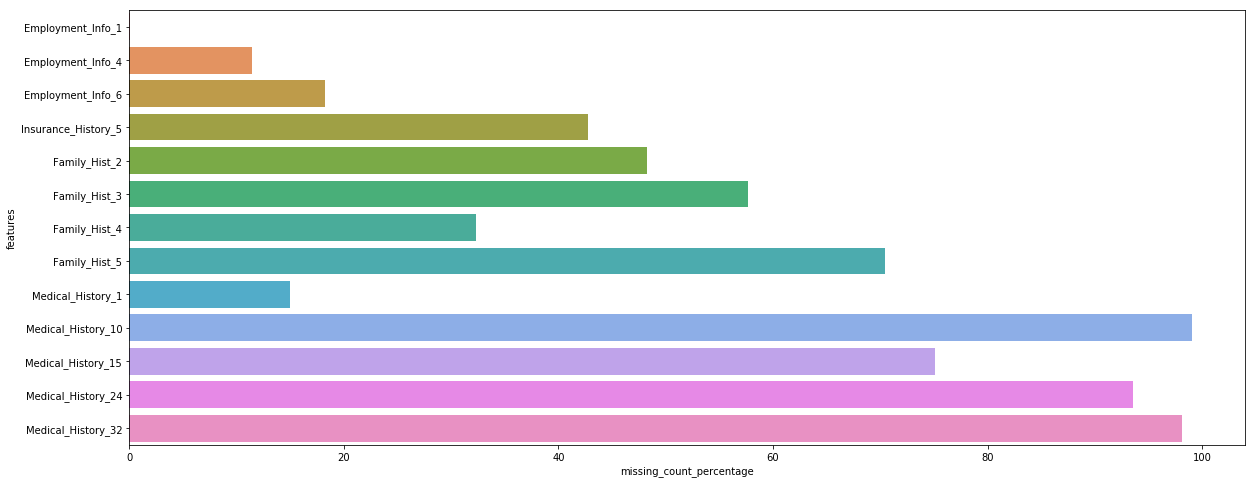

In [7]:
missing= df.isnull().sum()[df.isnull().sum() !=0]
missing=pd.DataFrame(missing.reset_index())
missing.rename(columns={'index':'features',0:'missing_count'},inplace=True)
missing['missing_count_percentage']=((missing['missing_count'])/len(df))*100
plt.figure(figsize=(20,8))
sns.barplot(y=missing['features'],x=missing['missing_count_percentage'])

In [8]:
missing

features  missing_count  missing_count_percentage
0     Employment_Info_1             19                  0.031997
1     Employment_Info_4           6779                 11.416110
2     Employment_Info_6          10854                 18.278574
3   Insurance_History_5          25396                 42.767889
4         Family_Hist_2          28656                 48.257860
5         Family_Hist_3          34241                 57.663226
6         Family_Hist_4          19184                 32.306630
7         Family_Hist_5          41811                 70.411411
8     Medical_History_1           8889                 14.969435
9    Medical_History_10          58824                 99.061990
10   Medical_History_15          44596                 75.101463
11   Medical_History_24          55580                 93.598963
12   Medical_History_32          58274                 98.135767

#### Removing columns with more the 50% null data 

In [9]:
missing[missing['missing_count_percentage']> 50]['features']

5          Family_Hist_3
7          Family_Hist_5
9     Medical_History_10
10    Medical_History_15
11    Medical_History_24
12    Medical_History_32
Name: features, dtype: object

In [10]:
for feature in missing[missing['missing_count_percentage']> 50]['features']:
    df.drop(feature,axis = 1, inplace = True) 

#### Plot distribution of null columns to determine whether to replace with mean or median 

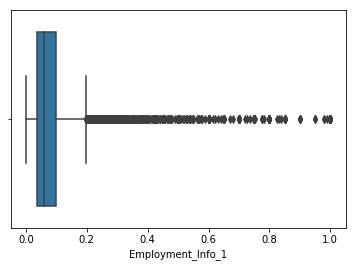

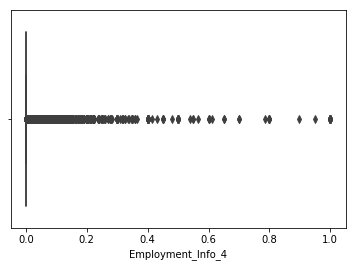

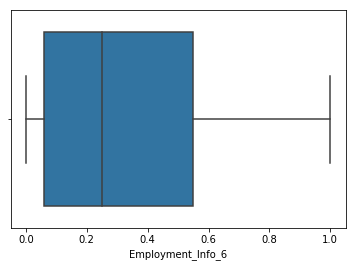

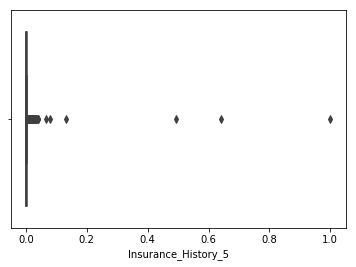

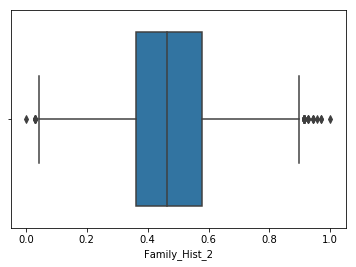

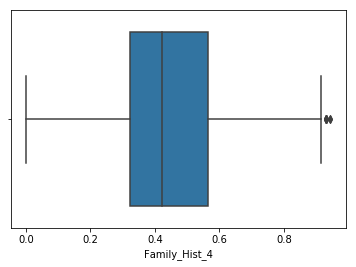

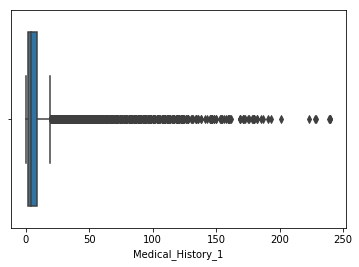

In [11]:
for feature in missing[missing['missing_count_percentage']<= 50]['features']:
    plt.figure()
    plt.plot(figsize=(15,10))
    sns.boxplot(df[feature])

#### Replacing null values with median as there are lot of outliers 

In [12]:
# not replacing nulls in variable Response as the records with Response as Null is test data
for feature in missing[missing['missing_count_percentage']<= 50]['features']:
    if feature != 'Response':
        df[feature].fillna(df[feature].median(),inplace=True)  

In [13]:
df.isnull().sum()

Id                     0
Product_Info_1         0
Product_Info_2         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_5    0
                      ..
Medical_Keyword_20     0
Medical_Keyword_21     0
Medical_Keyword_22     0
Medical_Keyword_23     0
Medical_Keyword_24     0
Medical_Keyword_25     0
Medical_Keyword_26     0
Medical_Keyword_27     0
Medical_Keyword_28     0


### 2. Formatting the data 

#### Check for inapproraite data types

In [14]:
df.dtypes

Id                       int64
Product_Info_1           int64
Product_Info_2          object
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
                        ...   
Medical_Keyword_20       int64
Medical_

#### Converting categorical feature to numeric 

In [15]:
le=LabelEncoder()
df['Product_Info_2']=le.fit_transform(df['Product_Info_2'])

### 3. Distribution of data

C:\Users\jaina\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\jaina\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


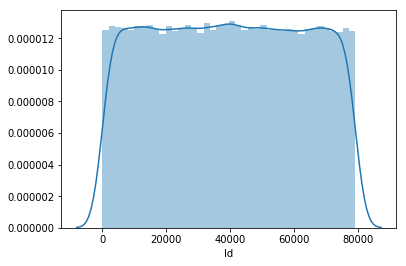

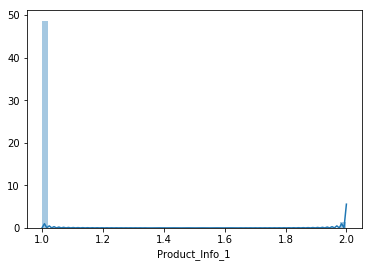

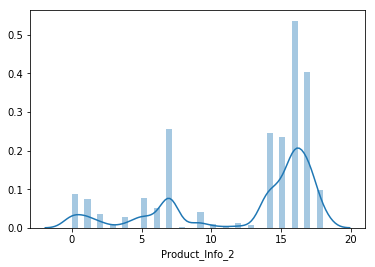

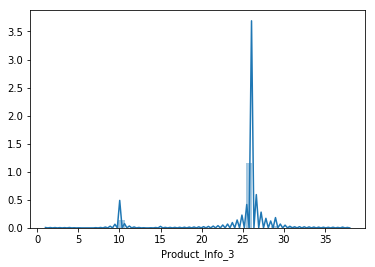

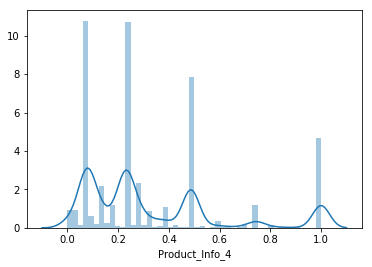

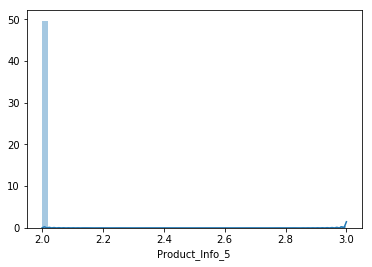

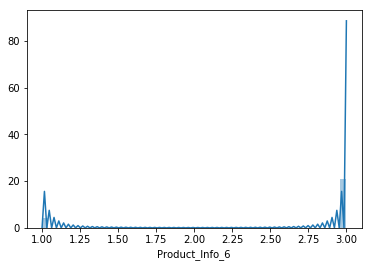

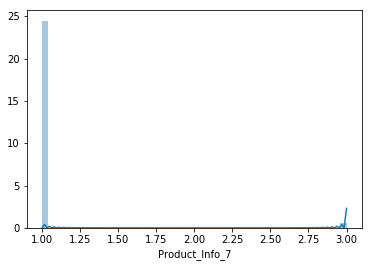

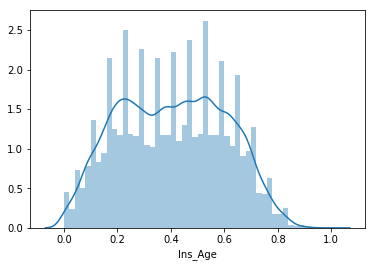

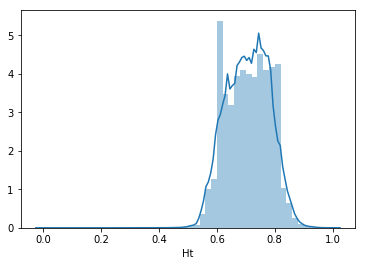

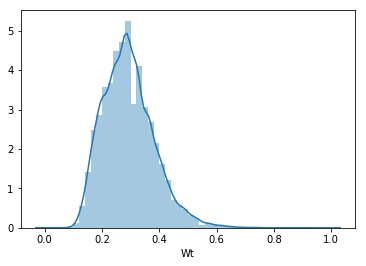

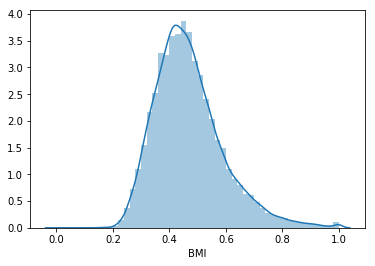

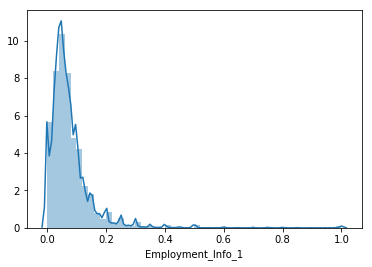

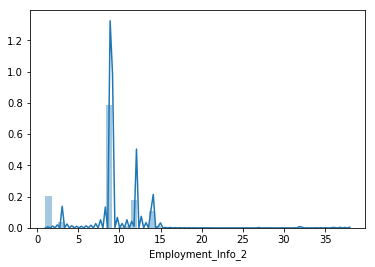

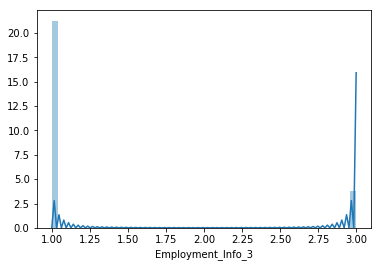

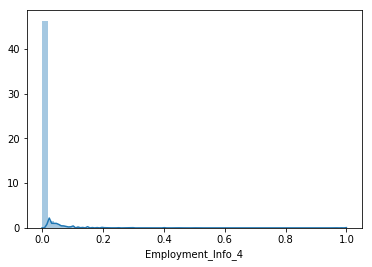

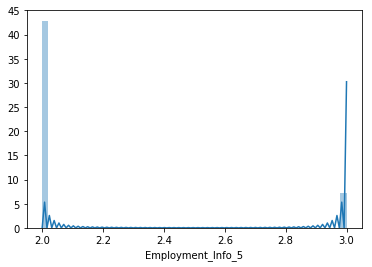

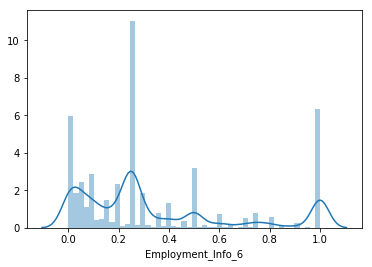

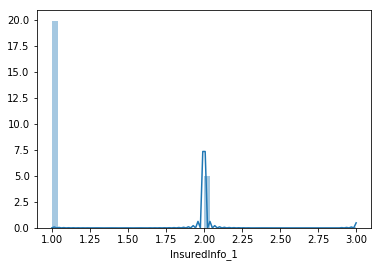

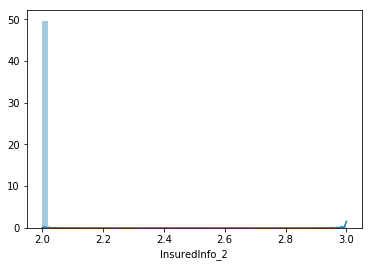

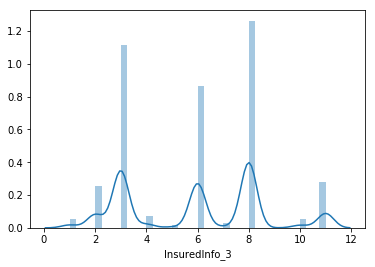

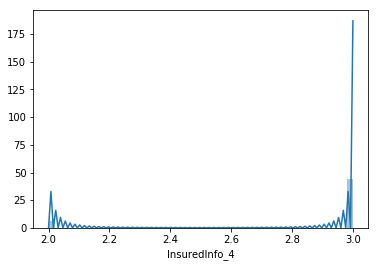

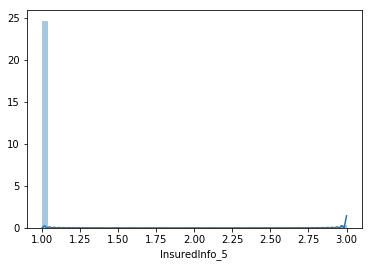

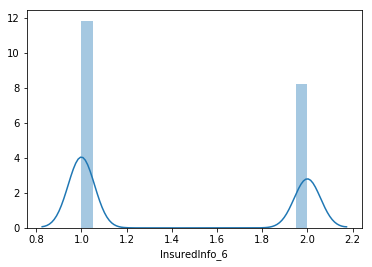

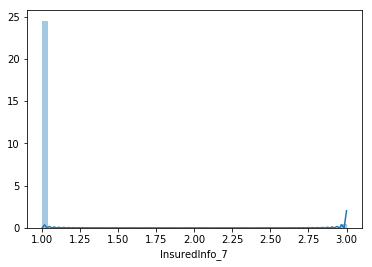

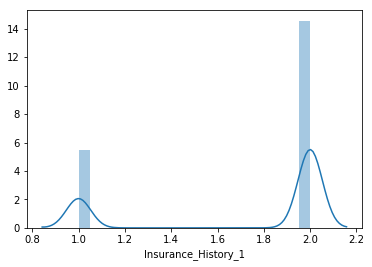

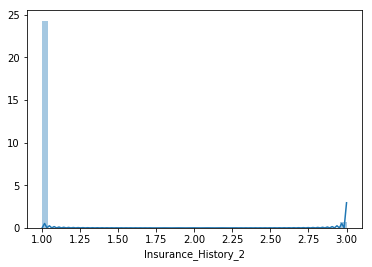

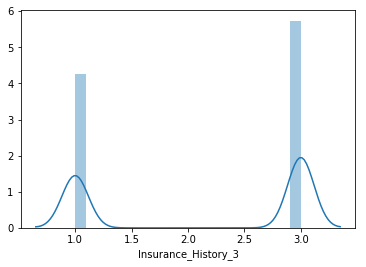

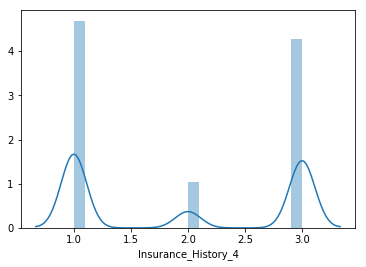

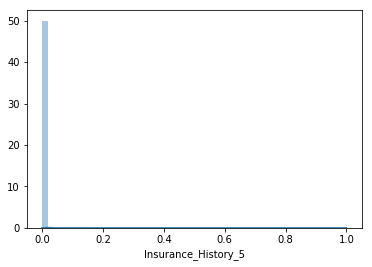

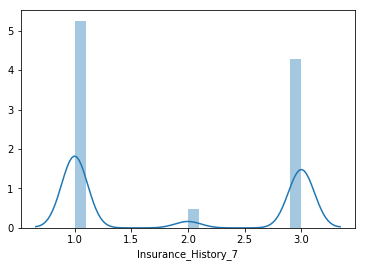

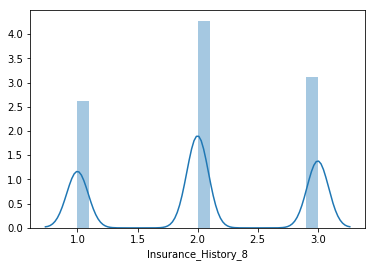

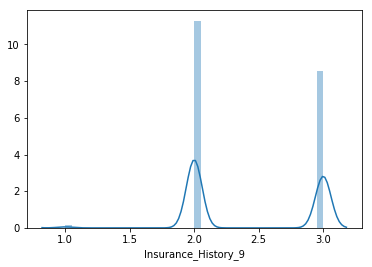

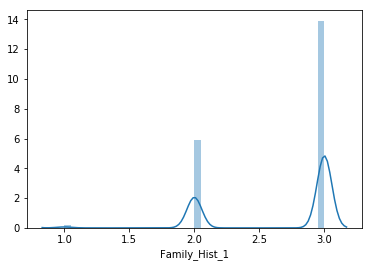

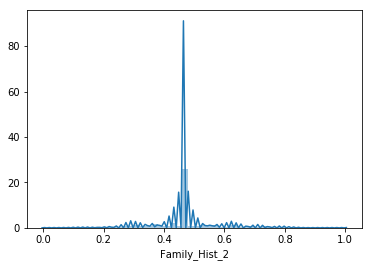

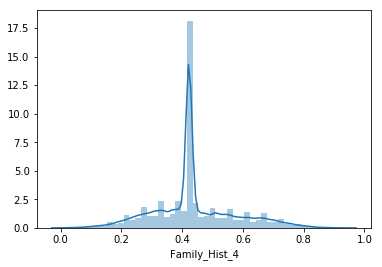

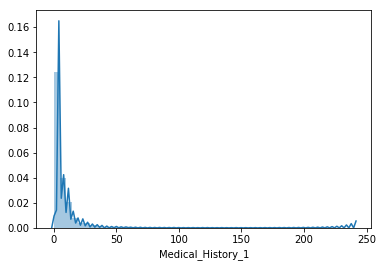

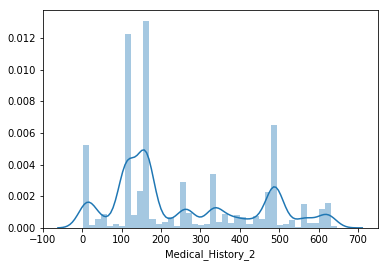

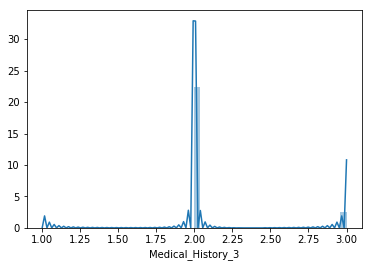

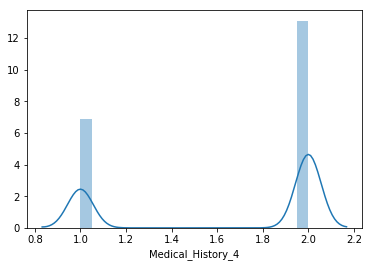

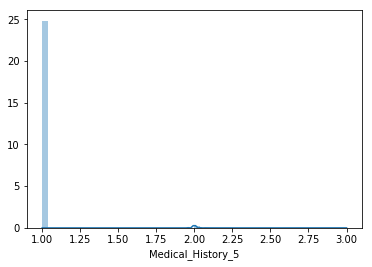

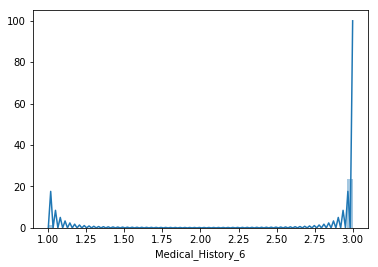

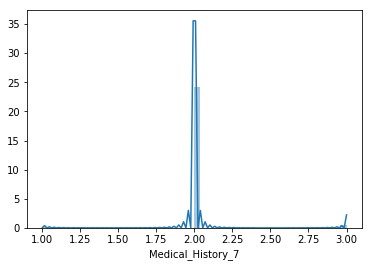

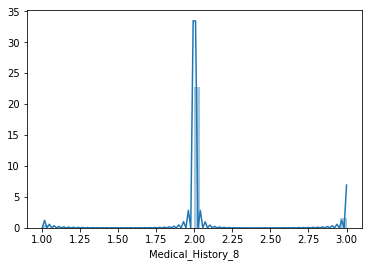

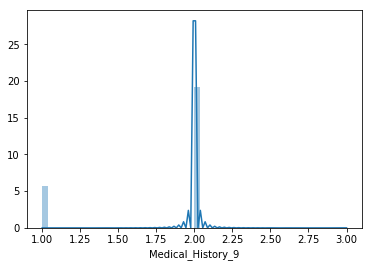

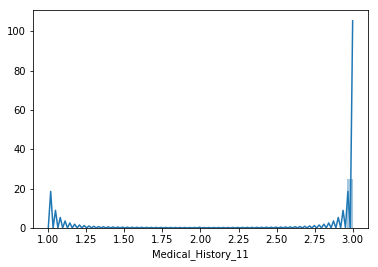

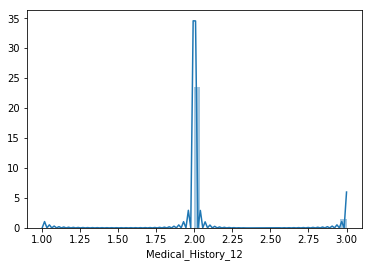

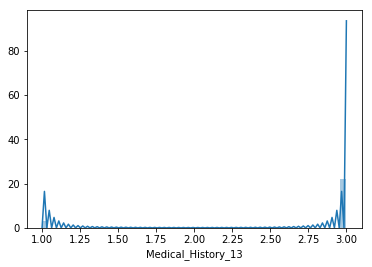

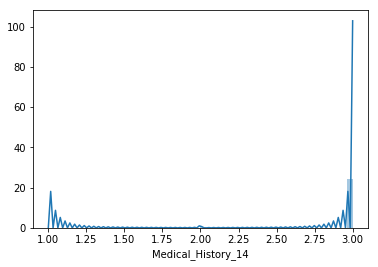

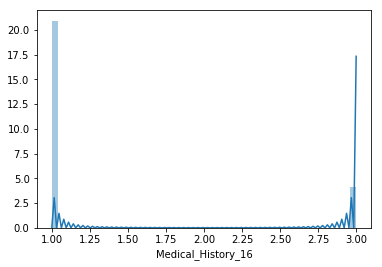

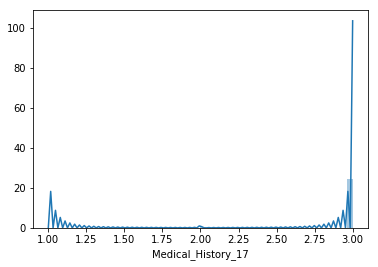

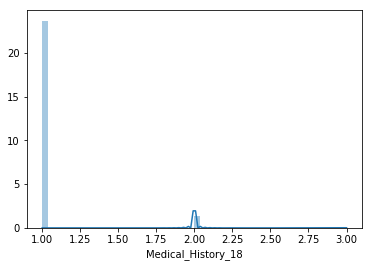

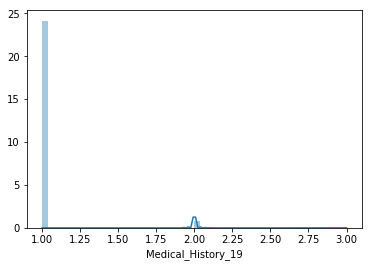

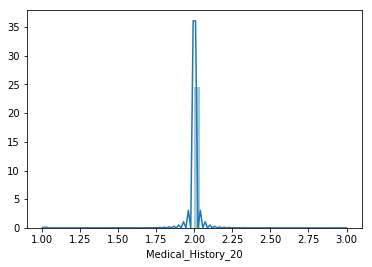

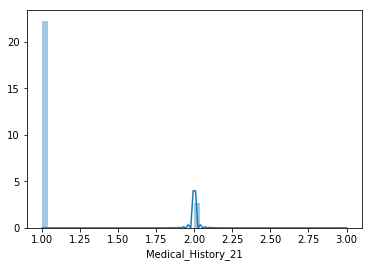

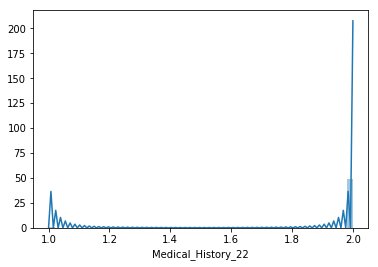

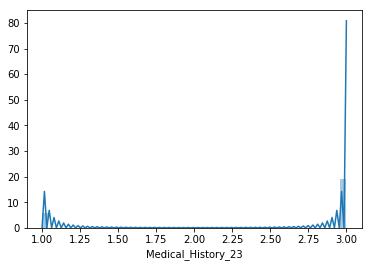

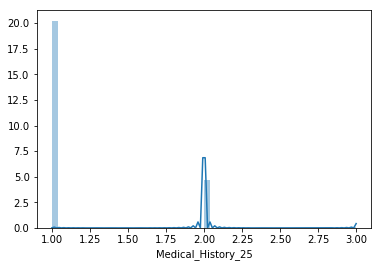

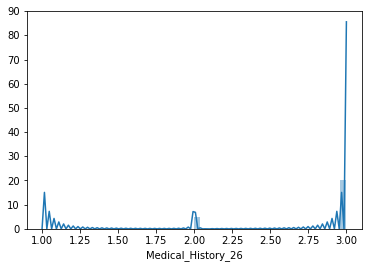

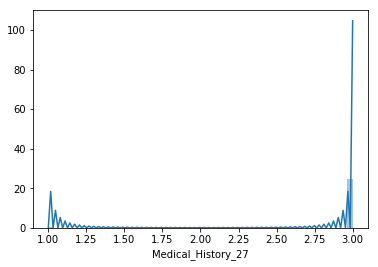

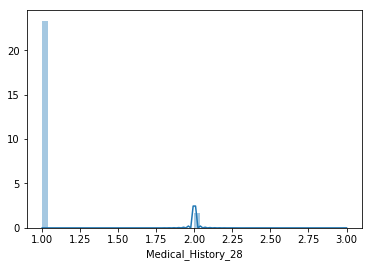

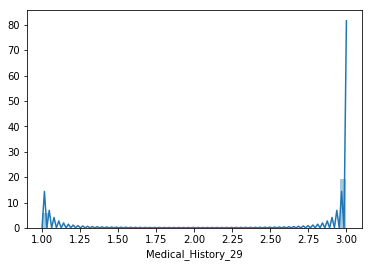

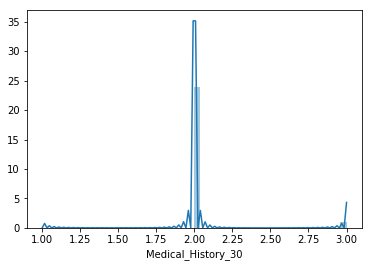

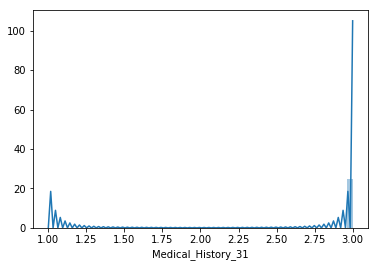

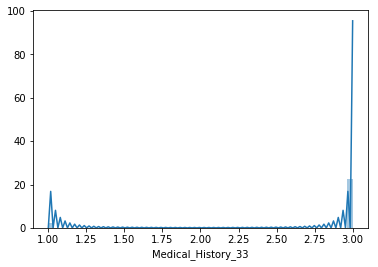

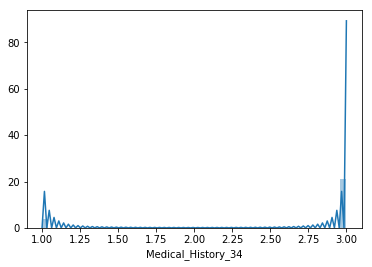

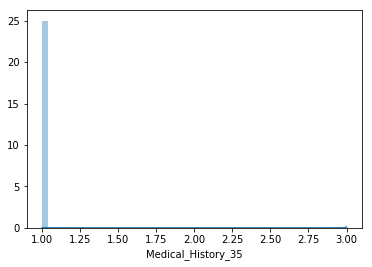

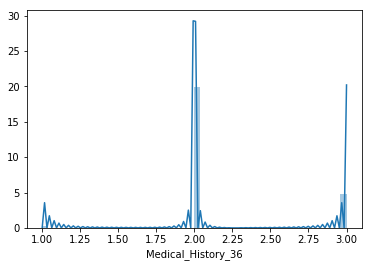

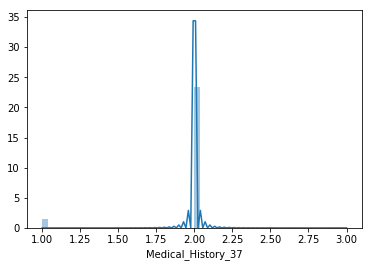

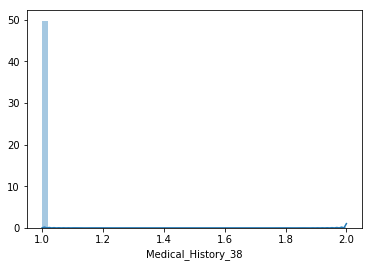

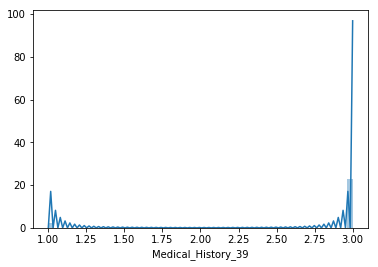

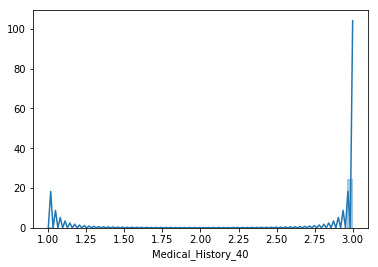

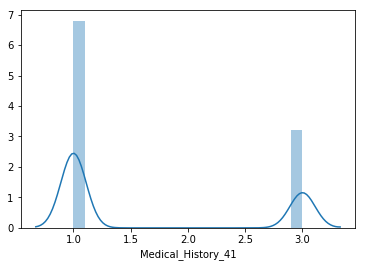

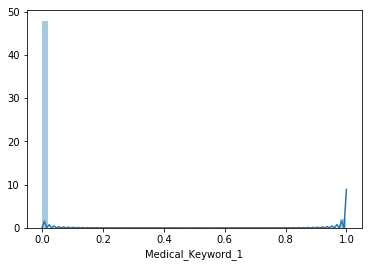

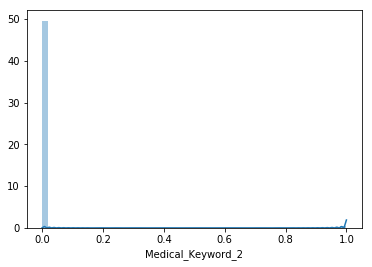

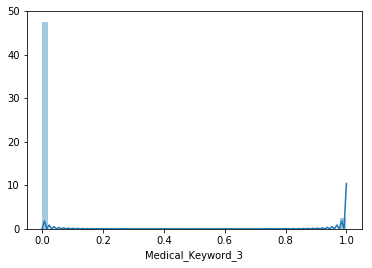

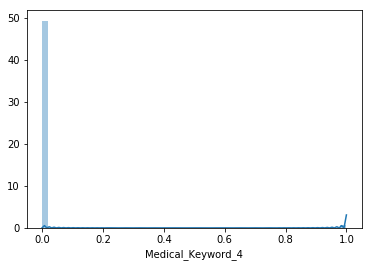

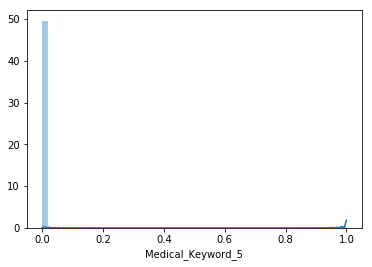

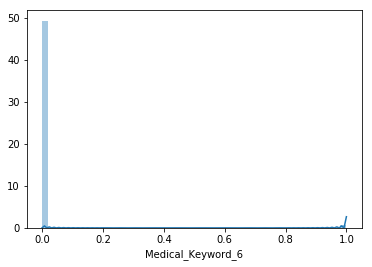

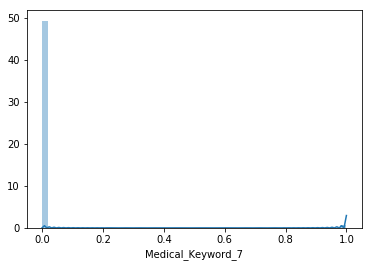

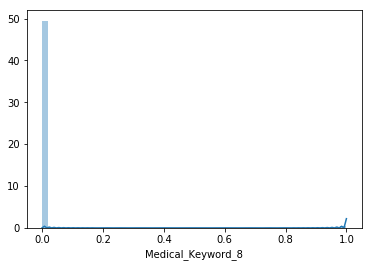

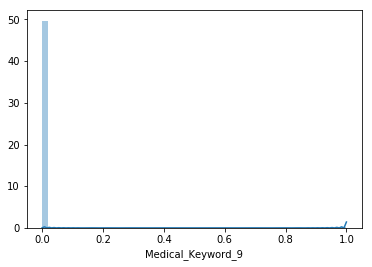

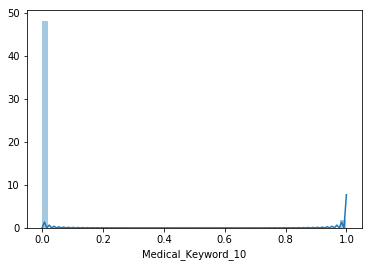

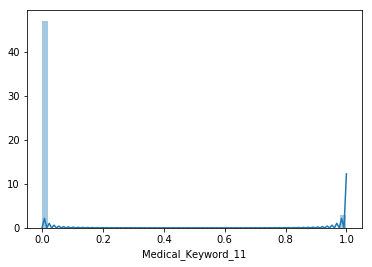

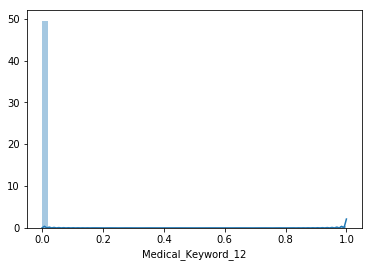

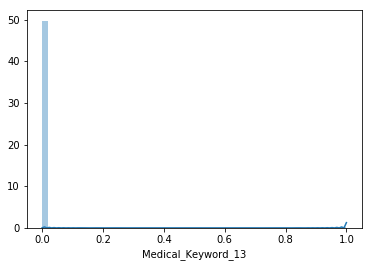

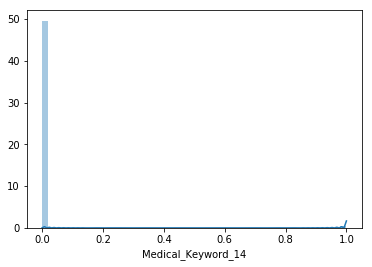

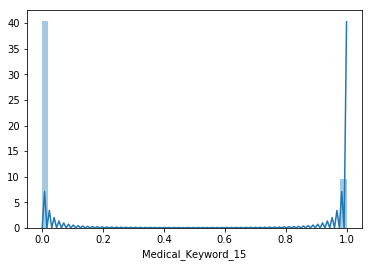

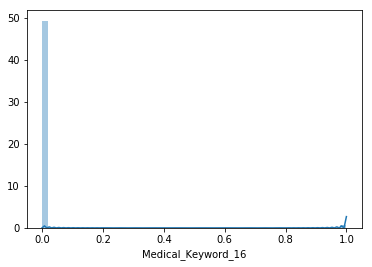

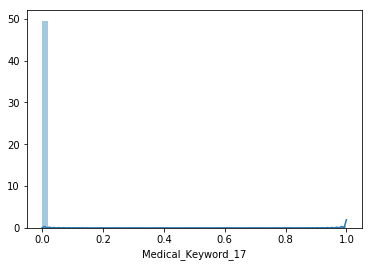

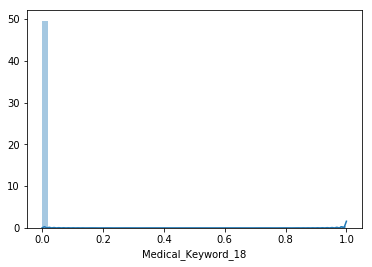

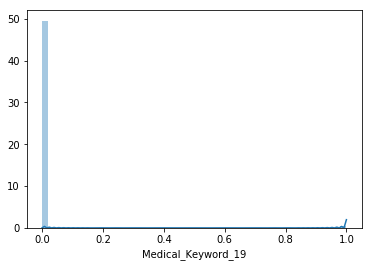

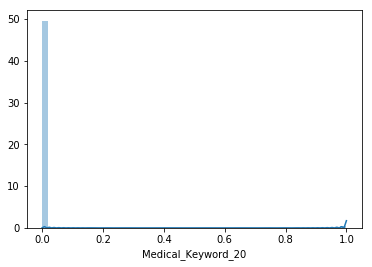

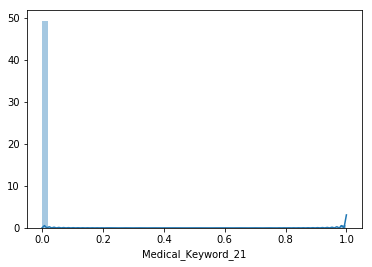

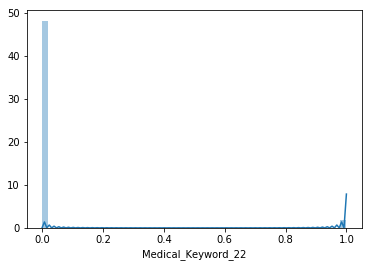

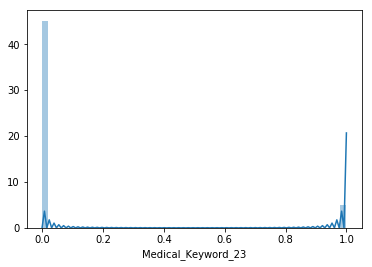

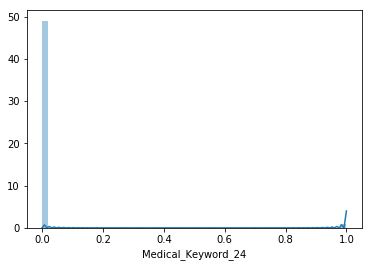

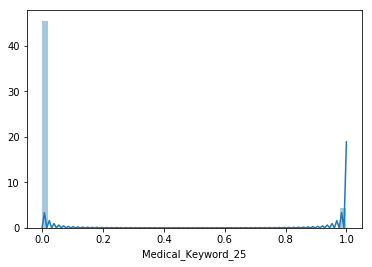

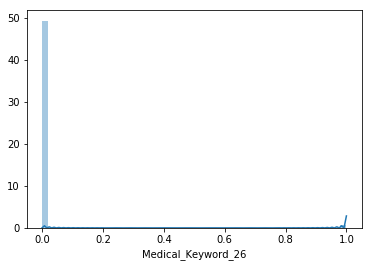

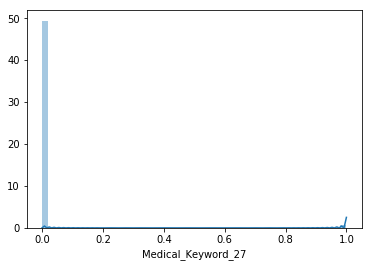

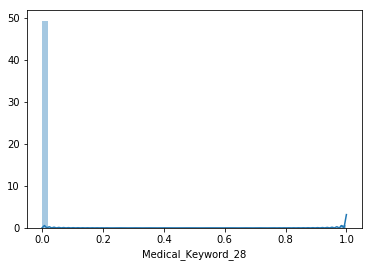

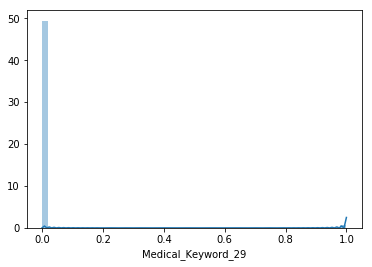

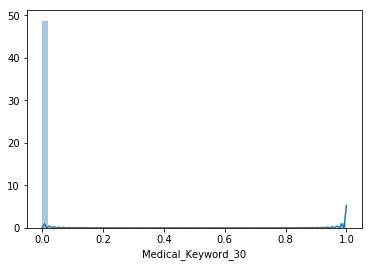

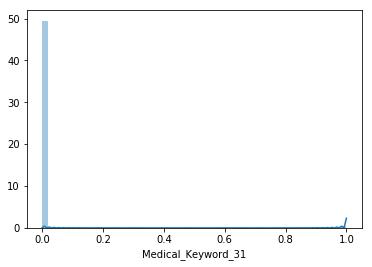

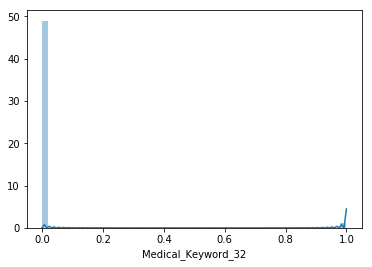

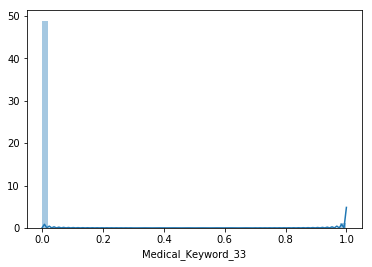

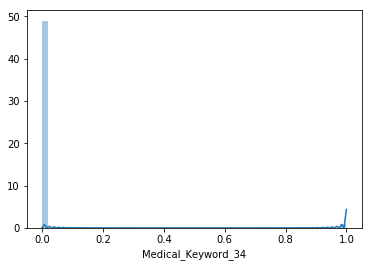

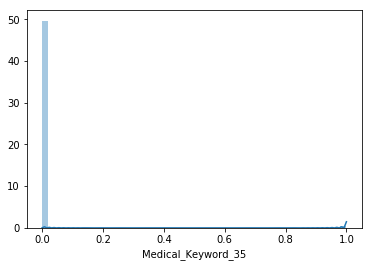

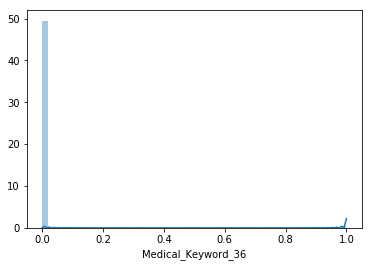

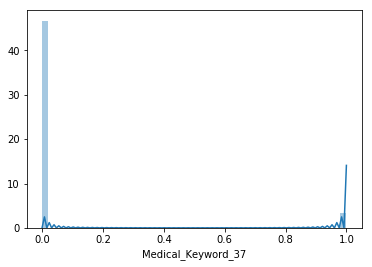

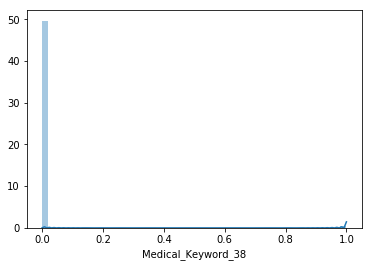

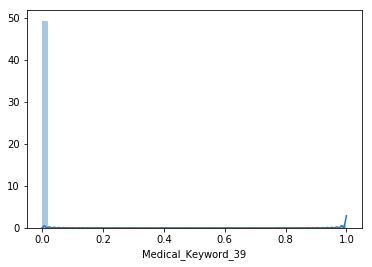

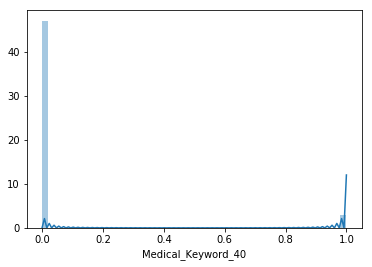

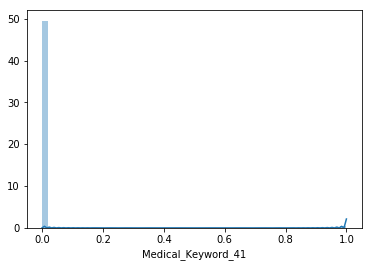

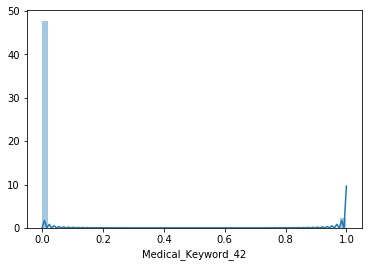

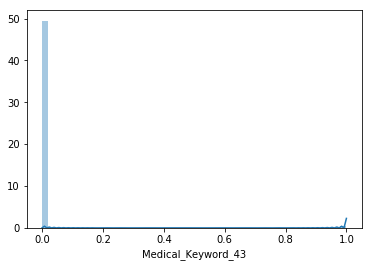

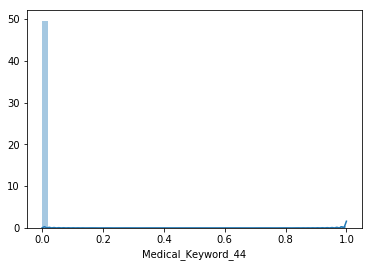

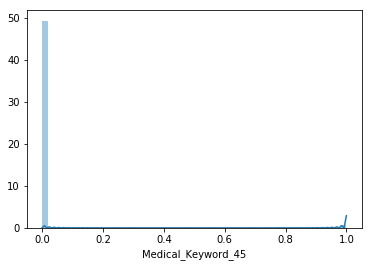

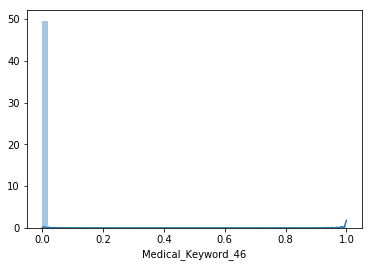

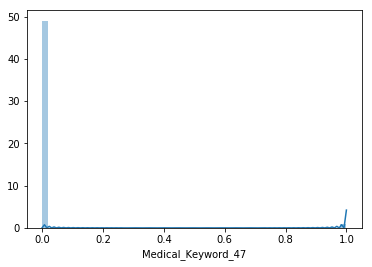

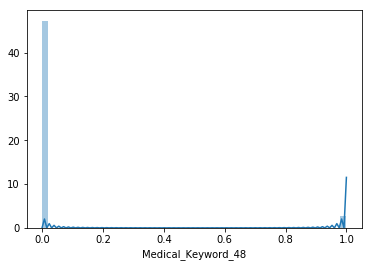

In [16]:
for column in df.columns:
    if column != 'Response':
        plt.figure()
        plt.plot(figsize=(15,10))
        sns.distplot(df[column])

### 4. Feature Selection

#### Removing the highly correlated features 

In [17]:
corr = df.corr()

In [18]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

From the above matrix , we identify the highly correlated variables  
1) BMI and Wt  
2) Insurance Ht_1 and Insurance Ht_8  
3) Insurance Ht_4 and Insurance Ht_7, Insurance Ht_9   
4) Medical_history_19 and Medical_Keyword_30  
5) Medical_History_36 and Medical_history_25  

In [19]:
df.drop(['Wt','Insurance_History_8','Insurance_History_7','Insurance_History_9','Medical_Keyword_30','Medical_History_25'],axis = 1, inplace = True) 

#### Removing features which have close to zero variance 

In [20]:
df1 = df.drop('Response',axis = 1)  # creating a new dataframe without target variable 

In [21]:
constant_filter = VarianceThreshold(threshold=0.01)  
constant_filter.fit(df1)  
len(df1.columns[constant_filter.get_support()])  

90

##### constant columns

In [22]:
constant_columns = [column for column in df1.columns  
                    if column not in df1.columns[constant_filter.get_support()]]

print(len(constant_columns)) 
for column in constant_columns:  
    df.drop(column,axis = 1, inplace = True) 

25


In [23]:
df.shape

(59381, 91)

#### Removing columns that dont effect eligibility score like 'ID'

In [24]:
df.drop('Id',axis = 1, inplace = True) 

### 5. Statistical summary of the clean data

In [25]:
df.describe()

Product_Info_1  Product_Info_2  Product_Info_3  Product_Info_4  \
count    59381.000000    59381.000000    59381.000000    59381.000000   
mean         1.026355       12.505381       24.415655        0.328952   
std          0.160191        5.415902        5.072885        0.282562   
min          1.000000        0.000000        1.000000        0.000000   
25%          1.000000        7.000000       26.000000        0.076923   
50%          1.000000       15.000000       26.000000        0.230769   
75%          1.000000       16.000000       26.000000        0.487179   
max          2.000000       18.000000       38.000000        1.000000   

       Product_Info_6  Product_Info_7       Ins_Age           BMI  \
count    59381.000000    59381.000000  59381.000000  59381.000000   
mean         2.673599        1.043583      0.405567      0.469462   
std          0.739103        0.291949      0.197190      0.122213   
min          1.000000        1.000000      0.000000      0.000000   
25%          3.000000        1.000000      0.238806      0.385517   
50%          3.000000        1.000000      0.402985      0.451349   
75%          3.000000        1.000000      0.567164      0.532858   
max          3.000000        3.000000      1.000000      1.000000   

       Employment_Info_2  Employment_Info_3      ...       Medical_Keyword_36  \
count       59381.000000       59381.000000      ...             59381.000000   
mean            8.641821           1.300904      ...                 0.010407   
std             4.227082           0.715034      ...                 0.101485   
min             1.000000           1.000000      ...                 0.000000   
25%             9.000000           1.000000      ...                 0.000000   
50%             9.000000           1.000000      ...                 0.000000   
75%             9.000000           1.000000      ...                 0.000000   
max            38.000000           3.000000      ...                 1.000000   

       Medical_Keyword_37  Medical_Keyword_39  Medical_Keyword_40  \
count        59381.000000        59381.000000        59381.000000   
mean             0.066587            0.013658            0.056954   
std              0.249307            0.116066            0.231757   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_42  Medical_Keyword_43  Medical_Keyword_45  \
count        59381.000000        59381.000000        59381.000000   
mean             0.045536            0.010710            0.013691   
std              0.208479            0.102937            0.116207   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_47  Medical_Keyword_48      Response  
count        59381.000000        59381.000000  59381.000000  
mean             0.019905            0.054496      5.636837  
std              0.139676            0.226995      2.456833  
min              0.000000            0.000000      1.000000  
25%              0.000000            0.000000      4.000000  
50%              0.000000            0.000000      6.000000  
75%              0.000000            0.000000      8.000000  
max              1.000000            1.000000      8.000000  

[8 rows x 90 columns]